In [1]:

import psycopg2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt


import seaborn as sns
import datetime

from Ignore import db_cred
conn = db_cred.connect_db()

In [2]:
query = '''
SELECT * 
FROM pitching AS p
JOIN allstar_full AS allstr
    ON allstr."playerID" =p."playerID"
JOIN master as m
    ON m."playerID" =p."playerID"
WHERE allstr."yearID" = p."yearID" AND m."playerID" =p."playerID"
ORDER BY allstr."yearID" DESC, p."playerID" ASC;
'''

In [3]:
df = pd.read_sql(query, conn)
prefix_col = []
for i, col in enumerate(list(df)):
    if i < 30:
        prefix_col.append('p_{}'.format(col))
    elif i < 38:
        prefix_col.append('allstr_{}'.format(col))
    else:
        prefix_col.append('m_{}'.format(col))
        
df.columns = prefix_col
df.head()

,p_playerID,p_yearID,p_stint,p_teamID,p_lgID,p_W,p_L,p_G,p_GS,p_CG,...,m_nameLast,m_nameGiven,m_weight,m_height,m_bats,m_throws,m_debut,m_finalGame,m_retroID,m_bbrefID
0,arrieja01,2016.0,1.0,CHN,NL,18.0,8.0,31.0,31.0,1.0,...,Arrieta,Jacob Joseph,225.0,76.0,R,R,2010-06-10,2016-09-28,arrij001,arrieja01
1,betande01,2016.0,1.0,NYA,AL,3.0,6.0,73.0,0.0,0.0,...,Betances,Dellin,265.0,80.0,R,R,2011-09-22,2016-10-01,betad001,betande01
2,brachbr01,2016.0,1.0,BAL,AL,10.0,4.0,71.0,0.0,0.0,...,Brach,Brad,215.0,78.0,R,R,2011-08-31,2016-10-01,bracb001,brachbr01
3,brittza01,2016.0,1.0,BAL,AL,2.0,1.0,69.0,0.0,0.0,...,Britton,Zachary Grant,195.0,75.0,L,L,2011-04-03,2016-10-02,britz001,brittza01
4,bumgama01,2016.0,1.0,SFN,NL,15.0,9.0,34.0,34.0,4.0,...,Bumgarner,Madison Kyle,250.0,77.0,R,L,2009-09-08,2016-09-30,bumgm001,bumgama01


In [4]:
list(df)

['p_playerID',
 'p_yearID',
 'p_stint',
 'p_teamID',
 'p_lgID',
 'p_W',
 'p_L',
 'p_G',
 'p_GS',
 'p_CG',
 'p_SHO',
 'p_SV',
 'p_IPouts',
 'p_H',
 'p_ER',
 'p_HR',
 'p_BB',
 'p_SO',
 'p_BAOpp',
 'p_ERA',
 'p_IBB',
 'p_WP',
 'p_HBP',
 'p_BK',
 'p_BFP',
 'p_GF',
 'p_R',
 'p_SH',
 'p_SF',
 'p_GIDP',
 'allstr_playerID',
 'allstr_yearID',
 'allstr_gameNum',
 'allstr_gameID',
 'allstr_teamID',
 'allstr_lgID',
 'allstr_GP',
 'allstr_startingPos',
 'm_playerID',
 'm_birthYear',
 'm_birthMonth',
 'm_birthDay',
 'm_birthCountry',
 'm_birthState',
 'm_birthCity',
 'm_deathYear',
 'm_deathMonth',
 'm_deathDay',
 'm_deathCountry',
 'm_deathState',
 'm_deathCity',
 'm_nameFirst',
 'm_nameLast',
 'm_nameGiven',
 'm_weight',
 'm_height',
 'm_bats',
 'm_throws',
 'm_debut',
 'm_finalGame',
 'm_retroID',
 'm_bbrefID']

Trim Data

Number of "All Star" Pitchers to Debut after Intergratoin (1947)

In [5]:
df = df[df.m_debut>datetime.datetime(1947, 1, 1).date()]
df['m_playerID'].nunique()

633

FIP vs ERA

Calculate FIP then Plot FIP vs ERA

Fielding Independent Pitching converts a pitcher's three true outcomes into an earned run average-like number. The formula is (13*HR+3*(HBP+BB)-2*K)/IP, plus a constant (usually around 3.2) to put it on the same scale as earned run average.

In [6]:
df["p_fip"] = (13 * df["p_HR"] + 3 (df["p_HBP"] + df["p_BB"]) - 2 * df["p_SO"]) / (df["p_IPouts"] / 3)





# df['My new column'] = 'default value'


TypeError: 'int' object is not callable

WHIP vs ERA? 

WHIP=(BB+H)/IP 

In [40]:
df["p_whip"] = (df["p_BB"] + df["p_H"])/(["p_IPouts"]/3)

TypeError: unsupported operand type(s) for /: 'list' and 'int'

gameScore (Bill James https://en.wikipedia.org/wiki/Game_score)


ratingAdj=4.7∗(pitcherrGS–teamrGS) --> pitcher rating relative to his team's rating

Calculate gameScore=47.4+strikeouts+(outs∗1.5)–(walks∗2)–(hits∗2)–(runs∗3)–(homeruns∗4)

BABIP The formula: Hits minus home runs, divided by at-bats minus home runs minus strikeouts plus sacrifice flies 
Babip Formula (H - HR)/(AB - HR - K + SF).


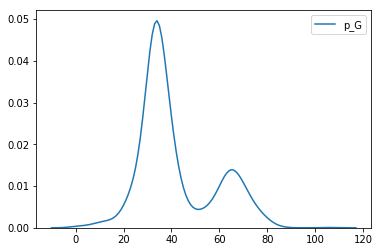

In [41]:
sns.kdeplot(df['p_G'].dropna())


/Users/md1265/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


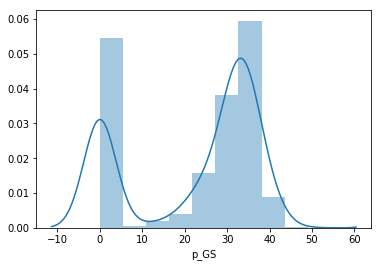

In [42]:
sns.distplot(df['p_GS'].dropna())

/Users/md1265/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/md1265/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


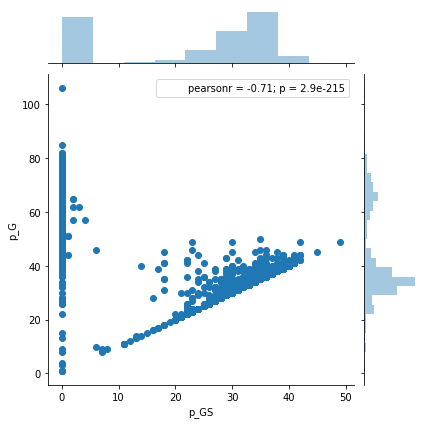

In [43]:
sns.jointplot(x="p_GS", y="p_G", data=df)

# Games vs Gamse started 
#Cut out relievers by saying "everyone over X amount of starts" (15?)
# What does this achieve? It shows us the amount of pitchers that are "Allstars" as Career starting pitchers. 
#are there many pitchers who succeed as Starting Pitcher and Relief Pitcher? 

/Users/md1265/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/md1265/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


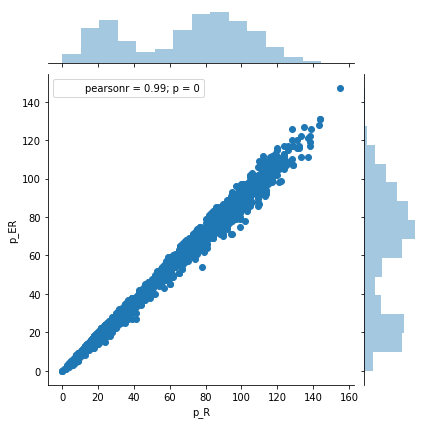

In [44]:
sns.jointplot(x="p_R", y="p_ER", data=df)


In [45]:
#  All star pitchers vs non_allstar pitchers  --> FIP, ERA, WHIP, BABIP, gameScore 
# over X amount of Starts and X amount of relief innings 

In [69]:
query2 = '''
SELECT * 
FROM pitching AS pitch
'''

df2 = pd.read_sql(query2, conn)



In [70]:
df3 = [df, df2]



In [ ]:
fmri = sns.load_dataset(data=df3)
sns.relplot(x="p_GS", y="p_ER", col="idk",
            hue="event", style="event",
            kind="line", data=fmri)



In [75]:
df3

[     p_playerID  p_yearID  p_stint p_teamID p_lgID   p_W   p_L   p_G  p_GS  \
 0     arrieja01    2016.0      1.0      CHN     NL  18.0   8.0  31.0  31.0   
 1     betande01    2016.0      1.0      NYA     AL   3.0   6.0  73.0   0.0   
 2     brachbr01    2016.0      1.0      BAL     AL  10.0   4.0  71.0   0.0   
 3     brittza01    2016.0      1.0      BAL     AL   2.0   1.0  69.0   0.0   
 4     bumgama01    2016.0      1.0      SFN     NL  15.0   9.0  34.0  34.0   
 5     colomal01    2016.0      1.0      TBA     AL   2.0   4.0  57.0   0.0   
 6     colonba01    2016.0      1.0      NYN     NL  15.0   8.0  34.0  33.0   
 7     cuetojo01    2016.0      1.0      SFN     NL  18.0   5.0  32.0  32.0   
 8     daviswa01    2016.0      1.0      KCA     AL   2.0   1.0  45.0   0.0   
 9     estrama01    2016.0      1.0      TOR     AL   9.0   9.0  29.0  29.0   
 10    familje01    2016.0      1.0      NYN     NL   3.0   4.0  78.0   0.0   
 11    fernajo02    2016.0      1.0      MIA     NL 

In [76]:
df3

AttributeError: 'list' object has no attribute 'head'

In [ ]:
}